# TD - Algorithmes d’Uzawa et des points intérieurs

Soit la fonction objectif definie pour $x = ( x_{1}, x_{2})  \in    \Re ^{2}$  par :

$J(x) = 3 x_{1}^{2} + 3 x_{2}^{2} - 2 x_{1}x_{2} -3x_{1}-7x_{2} +9$

On cherche un minimiseur dans l'ensemble C = $\big\{ x \in \Re ^{2} :  f_{1}(x) \leq 0,f_{2}(x) \leq 0  \big\}$
avec :
$f_{1}( x_{1}, x_{2}) = x_{1}^{2}+x_{2}^{2} -1$

$f_{2}( x_{1}, x_{2}) = 2x_{1} -1$



In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

C:\Users\gener\AppData\Local\Temp\ipykernel_12884\2191012977.py:34: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


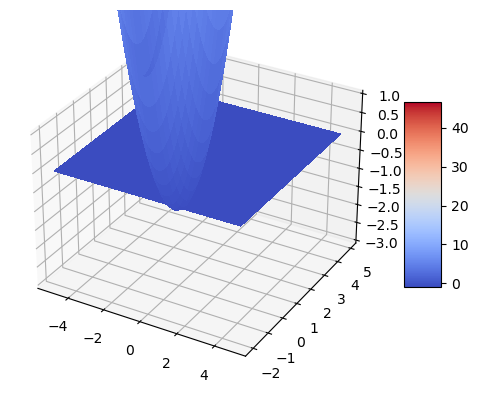

C:\Users\gener\AppData\Local\Temp\ipykernel_12884\2191012977.py:42: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
C:\Users\gener\AppData\Local\Temp\ipykernel_12884\2191012977.py:46: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf, shrink=0.5, aspect=5)


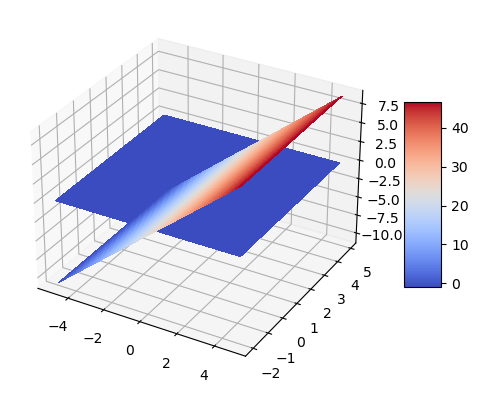

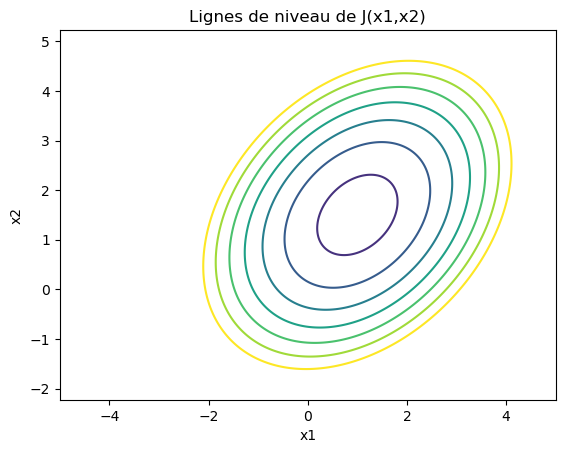

In [23]:
#draw_vector_field(J,  -8, 8, -3, 3, 18)
def draw_vector_field(F, xmin, xmax, ymin, ymax, N=20):
    X = np.linspace(xmin, xmax, N)  # x coordinates of the grid points
    Y = np.linspace(ymin, ymax, N)  # y coordinates of the grid points
    U, V = F(*np.meshgrid(X, Y))  # vector field
    M = np.hypot(U, V)  # compute the norm of (U,V)
    M[M == 0] = 1  # avoid division by 0
    U /= M  # normalize the u componant
    V /= M  # normalize the v componant
    return plt.quiver(X, Y, U, V, angles='xy')

def level_lines(f, xmin, xmax, ymin, ymax, levels, N=500):
    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)
    z = f(*np.meshgrid(x, y))
    level_l = plt.contour(x, y, z, levels=levels)
    #plt.clabel(level_l, levels, fmt='%.1f')


J = lambda x, y: 3*(x**2)+3*(y**2)-2*(x*y)-3*x-7*y+9
f1 = lambda x, y: x**2+y**2-1
f2 = lambda x, y: 2*x-1

x1=np.arange(-5,5,0.1)
x2=np.arange(-2,5,0.1)
X, Y = np.meshgrid(x1, x2)
Z1=X**2+Y**2-1
Z2=2*X-1
Zero=X*0+Y*0



fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
surf0=ax.plot_surface(X,Y,Zero, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_zlim(-3, 1)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, Z2, cmap=cm.coolwarm,linewidth=0, antialiased=False)
surf01=ax.plot_surface(X,Y,Zero, cmap=cm.coolwarm,linewidth=0, antialiased=False)
#ax.set_zlim(-3, 1)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

%matplotlib inline
plt.figure()  #figsize=(12,6)
level_lines(J, -5, 5, -2, 5, np.linspace(0, 28, 8))
plt.ylabel("x2")
plt.xlabel("x1")
plt.title("Lignes de niveau de J(x1,x2)")
plt.axis('equal')
plt.show()